In [287]:
from IPython.display import HTML


HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [288]:
%matplotlib inline
# I am leaving these libraries here for potential exploration in the future
import re
import pandas as pd
import time
import requests
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sbn
import textatistic
import string
import textblob
from wordcloud import *
import datetime
from datetime import datetime
from nltk import tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')
import psycopg2
py.offline.init_notebook_mode()

In [289]:
elon = pd.read_csv("data_elonmusk.csv",encoding="latin1")

In [290]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from      User  
0  2017-09-29 17:39:19          NaN  elonmusk  
1  2017-09-29 10:44:54       SpaceX  elonmusk  
2  2017-09-29 10:39:57          NaN  elonmusk  
3  2017-09-29 09:56:12          NaN  elonmusk  
4  2017-09-29 09:19:21          NaN  elonmusk

### Dropping the user colomn since all the tweets are by Elon

In [291]:
elon= elon.drop(["User"],axis=1)

In [292]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  
0  2017-09-29 17:39:19          NaN  
1  2017-09-29 10:44:54       SpaceX  
2  2017-09-29 10:39:57          NaN  
3  2017-09-29 09:56:12          NaN  
4  2017-09-29 09:19:21          NaN

In [293]:
translator = str.maketrans({key: None for key in string.punctuation if key != '@'})
def cleanText(description):
    description = description.lower()
    description = description.translate(translator)
    description = re.sub(r'\b\w\b', '', description)
    return description

In [294]:
elon['Tweet_cleaned_with_at'] = elon.Tweet.map(cleanText)

In [295]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  
0  @meltingice assuming max acceleration of  to  ...  
1  rt @spacex bfr is capable of transporting sate...  
2                                       @bigajm yup   
3                           part  httpstco8fvu57muhm  
4  fly to most places on earth in under 30 mins a...

### Who does Elon mention or tweet to in his tweets the most? 

In [296]:
a = []
for i in elon.Tweet_cleaned_with_at:
    i = i.split()
    for item in i:
        if item.startswith('@'):
            a.append(item)

In [297]:
dictionary = {}
for item in a:
    if item not in dictionary:
        dictionary[item] = 1 
    else: 
        dictionary[item] +=1
    
        


In [298]:
mention = pd.DataFrame()
mention["Mention"]= dictionary.keys()
mention["Count"]= dictionary.values()

In [299]:
mention= mention.sort_values(by=["Count"],ascending= False).reset_index(drop=True)

In [300]:
mention.head()

Mention  Count
0        @spacex    185
1   @teslamotors    180
2      @elonmusk     80
3          @nasa     39
4  @spacestation     26

### Breaking down the timing of the tweets

### Popular tweets per year

In [301]:
def year(y):
    y = y[ :4]
    return y 

def month(m):
    m = m[ 5:7]
    return m 

def day(d):
    d = d[ 8:10]
    return d
def hour(h):
    h = h[ 11:13]
    return h

In [302]:
elon["Year"] = elon.Time.map(year)
elon["Month"] = elon.Time.map(month)
elon["Day"] = elon.Time.map(day)
elon["Hour"] = elon.Time.map(hour)

In [303]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year Month Day Hour  
0  @meltingice assuming max acceleration of  to  ...  2017    09  29   17  
1  rt @spacex bfr is capable of transporting sate...  2017    09  29   10  
2                                       @bigajm yup   2017    09  29   10  
3                           part  httpstco8fvu57muhm  2017    09  29   09  
4  fly to most places on earth in under 30 mins a...  2017    09  29   09

In [304]:
elon['AM_PM']= ""

In [305]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year Month Day Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017    09  29   17   
1  rt @spacex bfr is capable of transporting sate...  2017    09  29   10   
2                                       @bigajm yup   2017    09  29   10   
3                           part  httpstco8fvu57muhm  2017    09  29   09   
4  fly to most places on earth in under 30 mins a...  2017    09  29   09   

  AM_PM  
0        
1        
2        
3        
4

In [306]:
elon[['Year', 'Month','Day','Hour']] = elon[['Year', 'Month','Day','Hour']].apply(pd.to_numeric)

In [307]:
elon.dtypes

row ID                   object
Tweet                    object
Time                     object
Retweet from             object
Tweet_cleaned_with_at    object
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
AM_PM                    object
dtype: object

### Adding a column to seperate moring-afternoon and evening tweets

In [308]:
for i, row in elon.iterrows():
    if row['Hour'] >= 18:
        elon.loc[i, 'AM_PM'] = 'Evening'
    else:
        elon.loc[i, 'AM_PM'] = 'Morning-Afternoon'

In [309]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM  
0  Morning-Afternoon  
1  Morning-Afternoon  
2  Morning-Afternoon  
3  Morning-Afternoon  
4  Morning-Afternoon

### How many tweets did Elon tweet per year?

In [310]:
#Using dictionaries:
yr= {}
for item in elon.Year:
    if item not in yr:
        count=1
        yr[item]=count
    else:
        yr[item]+=1
        

In [311]:
yr

{2012: 55, 2013: 479, 2014: 231, 2015: 436, 2016: 934, 2017: 1083}

In [312]:
df_year = pd.DataFrame()

In [313]:
df_year['YEAR'] = yr.keys()
df_year['COUNT'] = yr.values()

In [314]:
df_year.head()

YEAR  COUNT
0  2016    934
1  2017   1083
2  2012     55
3  2013    479
4  2014    231

In [315]:
df_year = df_year.sort_values(by=['YEAR']).reset_index(drop=True)

In [316]:
df_year.head()

YEAR  COUNT
0  2012     55
1  2013    479
2  2014    231
3  2015    436
4  2016    934

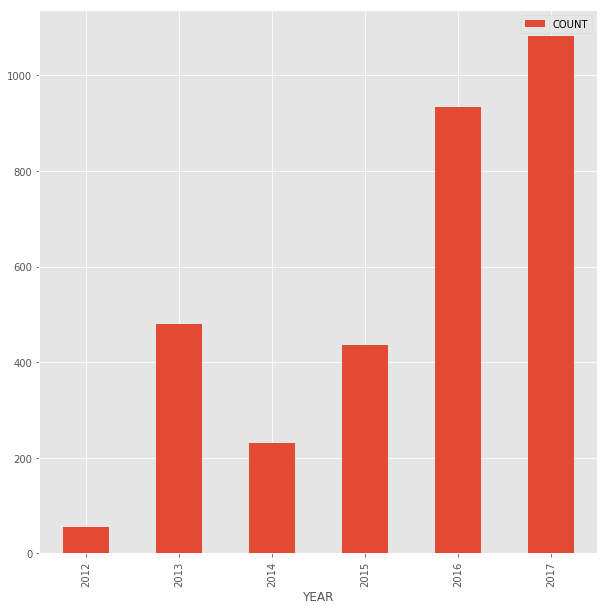

In [317]:
df_year.plot.bar(figsize= (10,10), x= 'YEAR', y='COUNT')

## How many tweets did Elon post per month?

### Using GroupBy instead of Dictionary to count the most popular Month Elon tweeted in

In [318]:
result = elon.groupby(elon.Month)['Month'].count()

In [319]:
df_mnth = pd.DataFrame(result)

In [320]:
df_mnth = df_mnth.rename(columns={'Month':'Count'}).reset_index()

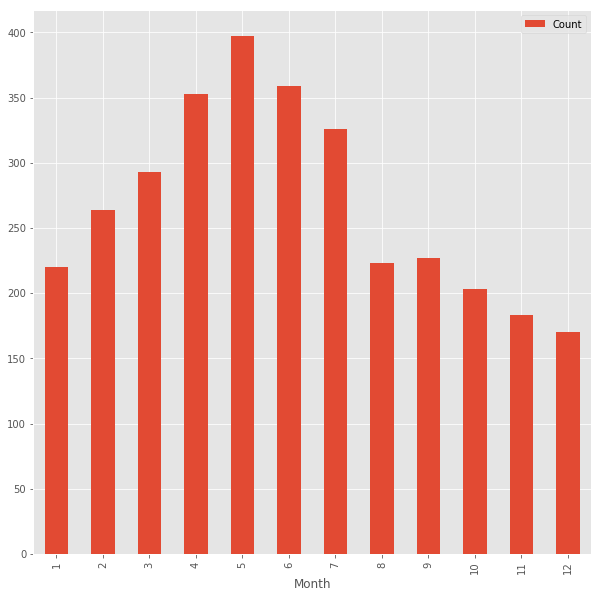

In [321]:
df_mnth.plot.bar(figsize = (10,10), x='Month', y= 'Count')

### How many tweets did Elon tweet per day? and which day is the most popular one?

In [322]:
result = elon.groupby(elon.Day)['Day'].count()

In [323]:
df_day = pd.DataFrame(result)

In [324]:
df_day = df_day.rename(columns={'Day':'Count'}).reset_index()

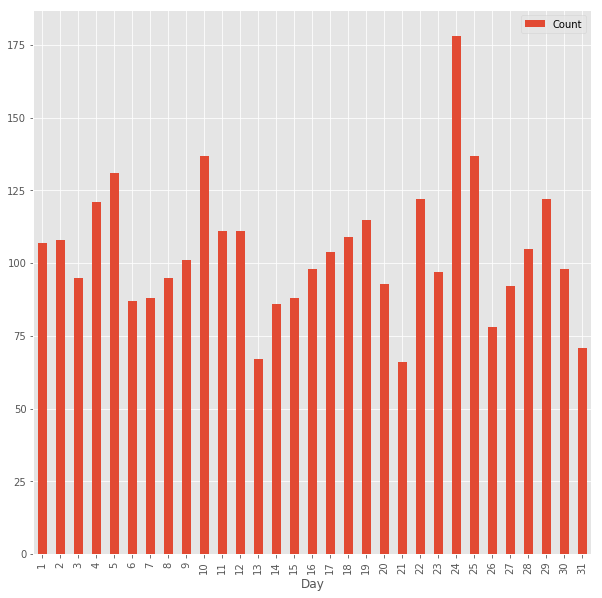

In [325]:
df_day.plot.bar(figsize = (10,10), x='Day', y= 'Count')

### Translating the numeric "days to days of the week":

In [326]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM  
0  Morning-Afternoon  
1  Morning-Afternoon  
2  Morning-Afternoon  
3  Morning-Afternoon  
4  Morning-Afternoon

In [327]:
def time(i):
    i = i[:10]
    return i

In [328]:
elon['DOW'] = ''

In [329]:
elon["Date"]= elon.Time.map(time)

In [330]:
def day_of_the_week(item):
    item = datetime.strptime(item, "%Y-%m-%d").strftime("%A")
    return item

In [331]:
elon['DOW'] = elon.Date.map(day_of_the_week)

In [332]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  
0  Morning-Afternoon  Friday  2017-09-29  
1  Morning-Afternoon  Friday  2017-09-29  
2  Morning-Afternoon  Friday  2017-09-29  
3  Morning-Afternoon  Friday  2017-09-29  
4  Morning-Afternoon  Friday  2017-09-29

In [333]:
result = elon.groupby(elon.DOW)['DOW'].count()

In [334]:
df_dow = pd.DataFrame(result)

In [335]:
df_dow = df_dow.rename(columns={'DOW':'Count'}).reset_index()

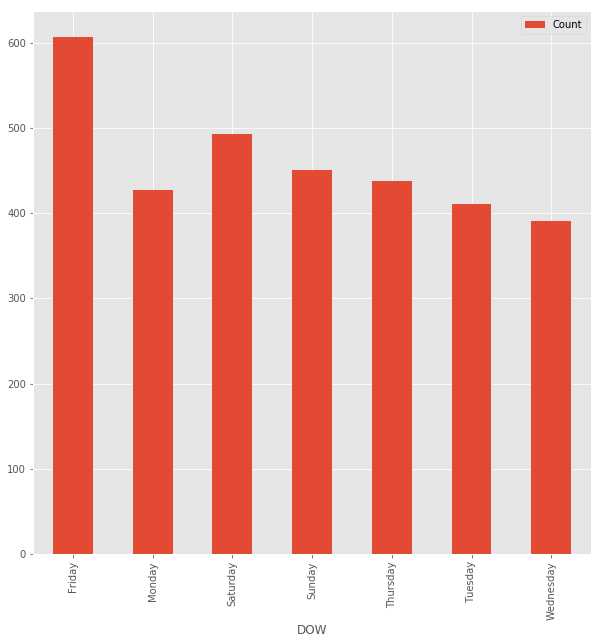

In [336]:
df_dow.plot.bar(figsize = (10,10), x='DOW', y= 'Count')

### What time of the day does Elon tweet the most?

In [337]:
result = elon.groupby(elon.AM_PM)['AM_PM'].count()

In [338]:
df_AM_PM = pd.DataFrame(result)

In [339]:
df_AM_PM = df_AM_PM.rename(columns={'AM_PM':'Count'}).reset_index()

In [340]:
df_AM_PM = df_AM_PM.set_index(['AM_PM'])

In [341]:
df_AM_PM

Count
AM_PM                   
Evening             1212
Morning-Afternoon   2006

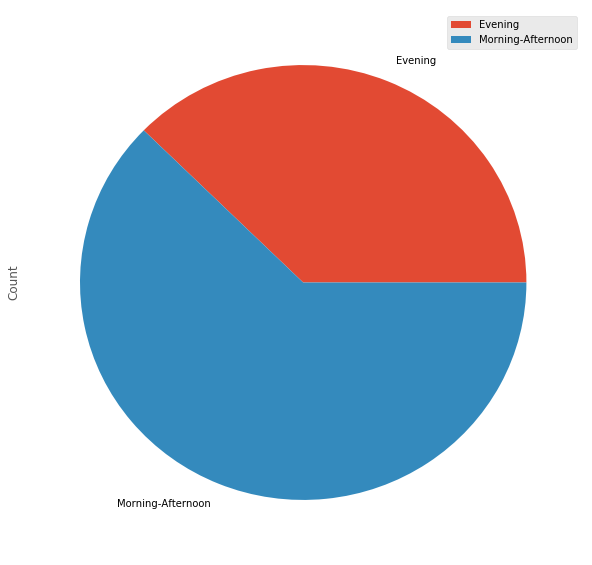

In [342]:
df_AM_PM.plot.pie(figsize = (10,10), x='AM_PM', y= 'Count')

## Tweets Complexity:
### Cleaning data and getting rid of unneccessary figures:
   

In [343]:
translator = str.maketrans({key: None for key in string.punctuation})
def cleanText(description):
    description = description.lower()
    description = description.translate(translator)
    description = re.sub(r'\b\w\b', '', description)
    return description

In [344]:
def tb_score(text):
    res=textblob.TextBlob(text)
    return res.sentiment.polarity

def tb_score_sub(text):
    res=textblob.TextBlob(text)
    return res.sentiment.subjectivity

In [345]:
def drop_http_and_at(item):
    item = item.split()
    for i in item:
        if i.startswith('http') or i.startswith('@'):
            item.remove(i)
    item = ' '.join(item)
    return item

In [346]:
elon['Tweet_without_http_and_at'] = elon.Tweet.map(drop_http_and_at)

In [347]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  
0  Assuming max acceleration of 2 to 3 g's, but i...  
1  RT BFR is capable of transporting satellites t...  
2                                             Yup :)  
3                                             Part 2  
4  Fly to most places on Earth in under 30 mins a...

In [348]:
elon["cleaned_tweets"]= elon.Tweet_without_http_and_at.map(cleanText)

In [349]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  \
0  Assuming max acceleration of 2 to 3 g's, but i...   
1  RT BFR is capable of transporting satellites t...   
2                                             Yup :)   
3                                             Part 2   
4  Fly to most places on Earth in under 30 mins a...   

                                      cleaned_tweets  
0  assuming max acceleration of  to  gs but in  c...  
1  rt bfr is capable of transporting satellites t...  
2                                               yup   
3                                              part   
4  fly to most places on earth in under 30 mins a...

In [350]:
elon["tb_score"]=elon.cleaned_tweets.map(tb_score)

In [351]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  \
0  Assuming max acceleration of 2 to 3 g's, but i...   
1  RT BFR is capable of transporting satellites t...   
2                                             Yup :)   
3                                             Part 2   
4  Fly to most places on Earth in under 30 mins a...   

                                      cleaned_tweets  tb_score  
0  assuming max acceleration of  to  gs but in  c...  0.366667  
1  rt bfr is capable of transporting satellites t...  0.200000  
2                                               yup   0.000000  
3                                              part   0.000000  
4  fly to most places on earth in under 30 mins a...  0.650000

### What are the negative tweets that were tweeted by Elon?

In [352]:
ng_twt =pd.DataFrame()

In [353]:
for i, row in elon.iterrows():
    if row['tb_score'] < 0:
        ng_twt.loc[i, 'neg_tweet'] = row['cleaned_tweets']

In [354]:
ng_twt = ng_twt.reset_index(drop=True)

In [355]:
ng_twt

neg_tweet
0    bfr will take you anywhere on earth in less th...
1                                      moon base alpha
2    prev ideas for paying 10b dev cost incl kickst...
3    def not ok just sent  reminder to tesla stores...
4                  promise to be as boring as possible
5    rt hackers have already started to weaponize a...
6    sorry about that youre right  was depressing m...
7    we took the spacextesla hyperloop pusher pod f...
8                  boringcompany not sure but probably
9    moon base alpha cheesy show but  loved it plus...
10   richardfpenn not that this is remotely equiv t...
11    model  in the boring company tunnel being dug...
12   sorry coming next year along with completing t...
13   hyperloop paradigmhype spacex and the boring c...
14       tesla does not really have ttunes thats  joke
15   will be hanging with my little chum gary on su...
16   jmackin2 wsj has been laboriously negative for...
17             it is approximately the size of  carrot
18   touchdown vertical velocity ms 147 lateral vel...
19    midnight amendment followed by  vigorously op...
20   yeah its kinda disgusting but my boys and  lov...
21   rt tesla unlocks level  referral program prize...
22   technology im not coming for anything just dig...
23   but you can check it out on btw this isnt  vid...
24   ericgarcetti yes just that the permitting proc...
25   spacex the danger is def high for south korea ...
26   12th mission of our dragon robotic space freig...
27   one other id like to correct from the biograph...
28                                 it gets really dark
29   ericdiepeveen maybe not medically tho dunno ba...
..                                                 ...
389  teslamotors please contact dmv commissioner an...
390  archforhumanity we have  lot of heavy lifting ...
391  stay tuned for  big supercharger announcement ...
392  which leads me to my next subject of gun contr...
393  no more political comments for me now that ive...
394  when  person dies the right thing to do is rem...
395  gronnbilnorge we are working hard to make that...
396  should be late 2014 for us and early 2015 for ...
397                              sorry correct link is
398  slight change of date to ensure no end of quar...
399  theres crazy theres batsht crazy then theres n...
400  testing separation of f9 rocket fairing can ho...
401  arrived austin talking with tx house about cre...
402  thruster pods one through four are now operati...
403  holding on solar array deployment until at lea...
404   minus 22 mins to launch mission  to dock with...
405  rt about to head home in our 2013 model   wont...
406  rt 126 miles to our hotel in boston game over ...
407  rt cnn retests the route rt not that hard at m...
408  tesla blog coming soon detailing what actually...
409  nytimes article about tesla range in cold is f...
410  wow 180000 american killed by other americans ...
411    single camera view of the 40 meter rocket hover
412  to provide  little perspective on the size of ...
413  roughly equivalent to  747 flight from la to l...
414  exactly mt imho continuing the uncontrolled ex...
415  it is hard to argue with  thermometer global w...
416  rt new government study says we could save bil...
417  and yes  do in fact know that this sounds craz...
418  mass judge denies auto dealers demand to kill ...

[419 rows x 1 columns]

In [356]:
count = 0
for i,row in ng_twt.iterrows():
    if 'spacex' in row['neg_tweet']:
        count += 1
    
print(len(ng_twt))    
print(count)

419
6


### How many negative tweets did Elon post?

In [357]:
ng_twt.count()

neg_tweet    419
dtype: int64

### What are the positive tweets posted by Elon?

In [358]:
pos_twt =pd.DataFrame()

In [359]:
for i, row in elon.iterrows():
    if row['tb_score'] > 0:
        pos_twt.loc[i, 'pos_tweet'] = row['cleaned_tweets']

In [360]:
pos_twt = pos_twt.reset_index(drop=True)

In [361]:
pos_twt.head(20)

pos_tweet
0   assuming max acceleration of  to  gs but in  c...
1   rt bfr is capable of transporting satellites t...
2   fly to most places on earth in under 30 mins a...
3   rt supporting the creation of  permanent selfs...
4   will be announcing something really special at...
5   rt nine years ago today falcon  became the fir...
6                     mayemusk congrats mom  love you
7   rt covergirl im so excited to say that im now ...
8   headed to adelaide soon to describe new bfr pl...
9   good nyt article from several years ago about ...
10                                               good
11  major improvements  some unexpected applicatio...
12  nathanbomey thats not  lot of money for  giant...
13  rt shocking winner of our latest worlds greate...
14  dont give up if the cause is important enough ...
15  absolutely moreover we expect to expand the fa...
16                                high res version at
17                                         most of it
18  long road to reusabity of falcon  primary boos...
19  tesla semi truck unveil  test ride tentatively...

In [362]:
count = 0
for i,row in pos_twt.iterrows():
    if 'spacex' in row['pos_tweet']:
        count += 1
print(len(pos_twt))
print(count)


1527
55


### How many positive tweets did Elon tweet?

In [363]:
pos_twt.count()

pos_tweet    1527
dtype: int64

### What are the most words used in negative tweets?

In [364]:
sw = set(stopwords.words())

In [365]:
patt = re.compile(r'rt|would|tesla|model|car|rocket|launch')

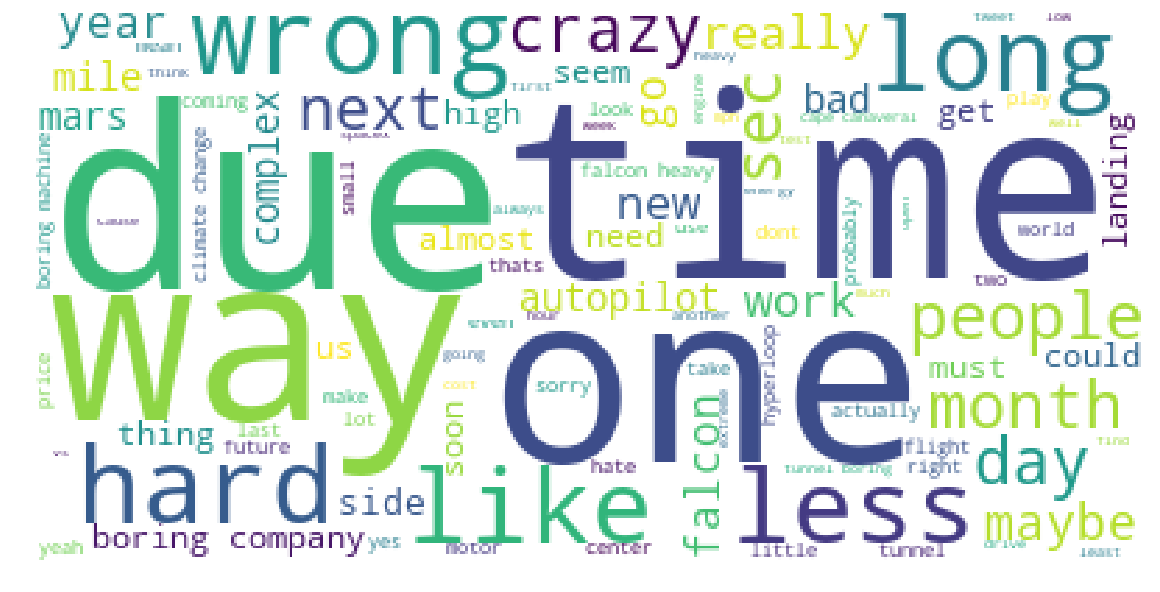

In [366]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(ng_twt.neg_tweet)))



ax.axis('off')
ax.imshow(wcp)

### What are the most words used in positive tweets?

In [367]:
patt = re.compile(r'rt|would|tesla|model|car|rocket|launch')

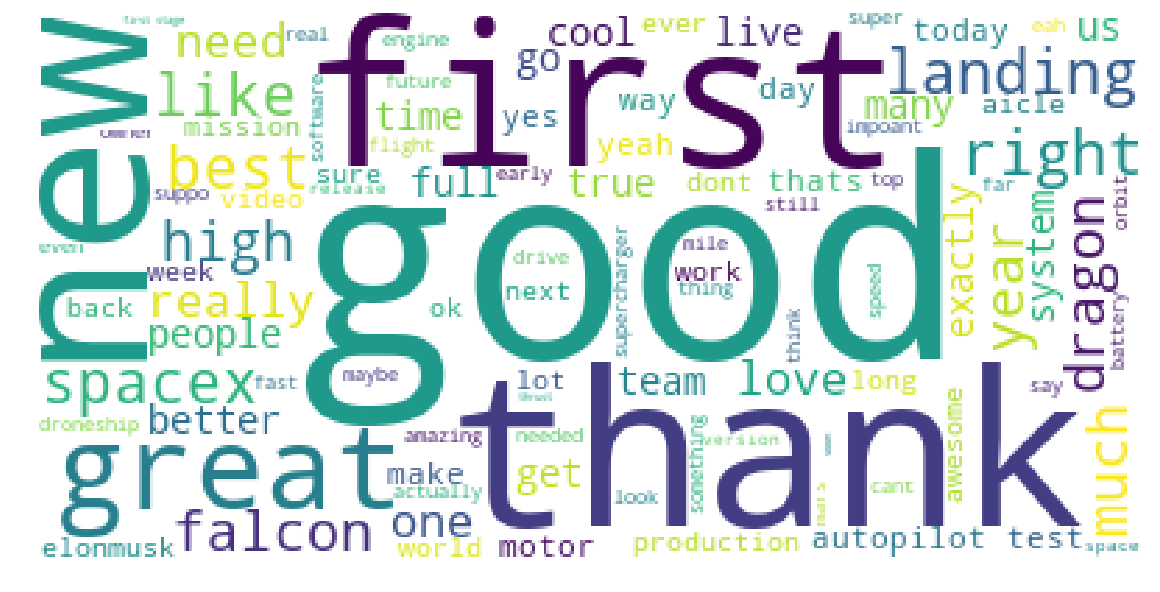

In [368]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(pos_twt.pos_tweet)))



ax.axis('off')
ax.imshow(wcp)

## Thesis Question: What makes Elon's companies successful? and how does he use twitter to help him grow his business and vision? 

#### There are many factors that contribute to Elon's companies success. Having said that, I have decided explore one factor in depth, which is his presense on social media, especially on Twitter, and how does he use it to grow his busness, receive feedbacks and share his ideas. 

#### We would start by looking at his overall mentions and find out which of his companies does he refer to the most

In [369]:
mention.head(10)

Mention  Count
0           @spacex    185
1      @teslamotors    180
2         @elonmusk     80
3             @nasa     39
4     @spacestation     26
5           @openai     21
6  @fredericlambert     20
7      @idaacarmack     17
8       @electrekco     16
9            @wired     15

#### We can see that Spacex and Teslamotors are leading the list, and occupy the majority of the topics he covers in his tweets. 
#### To narrow it down further, I am going to focus on analysing the sentiments of his Spacex and Tesla tweets.

#### My approach in this analysis is to see the amount of positive and negative tweets he has for each company and compare the results, which would give us a better image of Elon's approach to his business and how does he present it. 

## Analyzing Tesla Tweets:

In [370]:
elon_Tesla = elon[elon.cleaned_tweets.str.contains("tesla")]

### Positive Tweets about Tesla

In [371]:
elon_Tesla

row ID                                              Tweet  \
28      Row28  @Bobby_Gupta Def not ok. Just sent a reminder ...   
30      Row30  @JayCruicks_ATC What if we just made a mini ve...   
36      Row36  Tesla Semi truck unveil & test ride tentativel...   
45      Row45  RT @TeslaMotors: Our new Supercharger route in...   
58      Row58  We took the SpaceX/Tesla Hyperloop pusher pod ...   
60      Row60  RT @karpathy: We're hiring strong ML/CV/Roboti...   
96      Row96  @Techmeme Tesla does not really have TTunes. T...   
116    Row116  RT @Teslarati: Tesla unlocks ?Level 2? referra...   
128    Row128  @dfchil We are going to move all info and sett...   
143    Row143  Tesla Powerwalls can support houses of any siz...   
172    Row172  @LWRGI Major increases in the Supercharger and...   
185    Row185  Officially verified as the first production el...   
211    Row211  RT @TeslaMotors: Watch a Tesla Model 3 vs. Vol...   
226    Row226                 @mathetes76 Tesla team will verify   
227    Row227  RT @Teslarati: Remembering some of our favorit...   
231    Row231  Love this Tesla P100D drag racing video https:...   
241    Row241  @andygen21 @Teslarati Yes, I postponed publish...   
245    Row245  @DrChrisVieira LA-SF-Reno/Sparks would be grea...   
259    Row259  RT @TeslaMotors: Tesla welcomes Linda Johnson ...   
261    Row261  @aylaberan True. Need to explain full story of...   
264    Row264  I should clarify: Tesla stock is obviously hig...   
291    Row291  You can now drive anywhere in the US (except N...   
310    Row310  RT @BBCWorld: Tesla to build 'biggest battery'...   
317    Row317  Wanted to say thanks to all that own or ordere...   
321    Row321     @cristian_miuta @TeslaMotors Norway is awesome   
390    Row390  RT @karpathy: Excited to join Tesla as the Dir...   
413    Row413  Tesla service rescues a kitten stuck in the bu...   
422    Row422  RT @cnntech: The Tesla Model X is the safest S...   
426    Row426  RT @ElectrekCo: Watch the first Tesla Model X ...   
431    Row431  @ElectrekCo @TeslaRoadTrip HW2 Autopilot relea...   
...       ...                                                ...   
3041  Row3041  To be clear, Tesla is in California, so it is ...   
3042  Row3042  First profitable Q for Tesla thanks to awesome...   
3044  Row3044  Thanks Bob ?@BobMetcalfe: Tesla Takes on TX De...   
3046  Row3046  If you support Tesla in Texas, please contact ...   
3047  Row3047  Auto dealers in Texas are trying to stop Tesla...   
3069  Row3069  Review of Tesla Model S by @RoadandTrack. Good...   
3077  Row3077  Craig Venter talks about flu vaccines and the ...   
3078  Row3078  Using Über to order a Tesla Model S @SXSW with...   
3081  Row3081  RT @timoreilly: Nice. Tesla to pay off govt lo...   
3082  Row3082  Check out Model S at Tesla Austin Gallery at T...   
3086  Row3086  Minnesota auto dealers tried to pass legislati...   
3116  Row3116  RT @johnvoelcker: This is one very, very happy...   
3124  Row3124  RT @YaelTAbouhalkah: Interesting: @nytimes pub...   
3125  Row3125  RT @TeslaRoadTrip: #TeslaRoadTrip All - thanks...   
3126  Row3126  RT @LawrenceChanin: @TeslaRoadTrip @avantgame ...   
3141  Row3141  @batasrki Yeah, Top Gear pretended the Tesla R...   
3142  Row3142  @tomleykis Thanks Tom! Support of real Tesla c...   
3143  Row3143  Tesla data logging is only turned on with expl...   
3144  Row3144  Tesla blog coming soon detailing what actually...   
3145  Row3145  NYTimes article about Tesla range in cold is f...   
3150  Row3150  RT @jordanrushbloch: My latest project on the ...   
3157  Row3157  Maybe already under control, but Tesla & Space...   
3164  Row3164  CA's Death Valley is #1 again! Tesla hot weath...   
3165  Row3165  RT @gigaom: Tesla?s solar powered super charge...   
3173  Row3173  Thanks! ?@ev: Have driven a Tesla Model S 50 m...   
3186  Row3186  Tesla articles 30 mins apart: This Stock is Sc...   
3188  Row3188  Tesla was just approved for a full Class 1 Mas..

In [416]:
elon_Tesla.count()

row ID                       422
Tweet                        422
Time                         422
Retweet from                 115
Tweet_cleaned_with_at        422
Year                         422
Month                        422
Day                          422
Hour                         422
AM_PM                        422
DOW                          422
Date                         422
Tweet_without_http_and_at    422
cleaned_tweets               422
tb_score                     422
pos_neg                      422
dtype: int64

In [375]:
pos_twt =pd.DataFrame()

In [376]:
for i, row in elon_Tesla.iterrows():
    if row['tb_score'] >0:
        pos_twt.loc[i, 'pos_tweet'] = row['cleaned_tweets']

In [377]:
pos_twt = pos_twt.reset_index(drop=True)

In [413]:
pos_twt.head()

pos_tweet
0  tesla semi truck unveil  test ride tentatively...
1  rt our new supercharger route in south austral...
2  rt were hiring strong mlcvroboticists for the ...
3  tesla powerwalls can support houses of any siz...
4  major increases in the supercharger and tesla ...

In [414]:
pos_twt.count()

pos_tweet    221
dtype: int64

In [430]:
#patt = re.compile(r'rt|would|spacex|model|car|rocket|launch')

#### A Word Cloud representing the most words used in Elon's positive tweets about Tesla

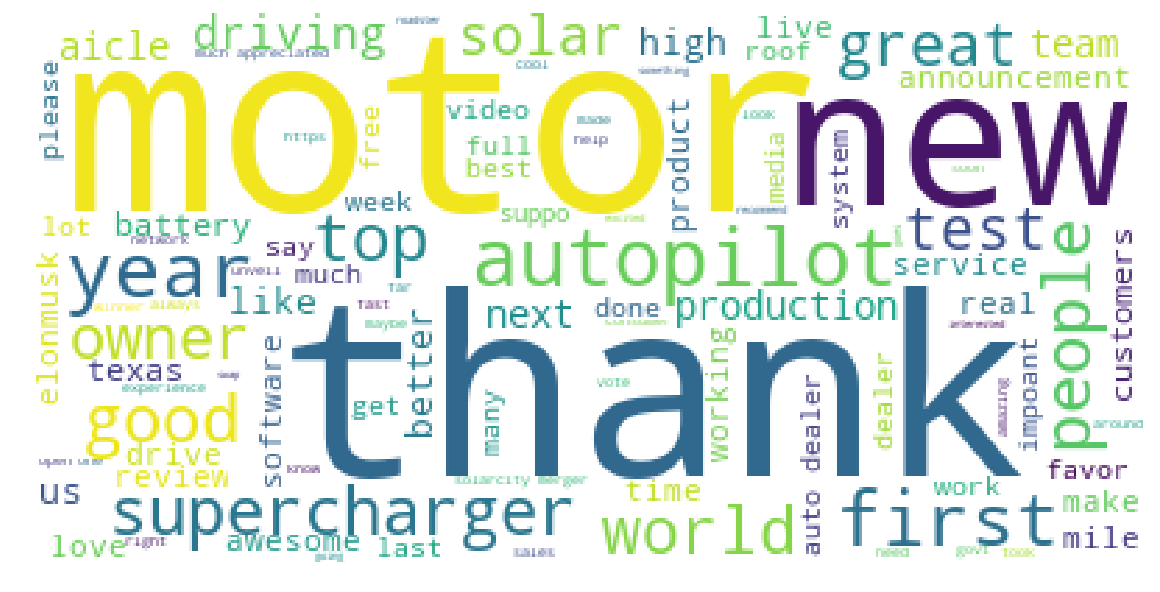

In [431]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(pos_twt.pos_tweet)))



ax.axis('off')
ax.imshow(wcp)

### Negative tweets about Tesla?

In [381]:
ng_twt =pd.DataFrame()

In [382]:
for i, row in elon_Tesla.iterrows():
    if row['tb_score'] < 0:
        ng_twt.loc[i, 'neg_tweet'] = row['cleaned_tweets']

In [383]:
ng_twt = ng_twt.reset_index(drop=True)

In [384]:
ng_twt

neg_tweet
0   def not ok just sent  reminder to tesla stores...
1   we took the spacextesla hyperloop pusher pod f...
2       tesla does not really have ttunes thats  joke
3   rt tesla unlocks level  referral program prize...
4    should clarify tesla stock is obviously high ...
5   teslaroadtrip hw2 autopilot release should go ...
6   in the us you can ask your tesla to play any m...
7   still on for end of year just software limited...
8   rt tesla just released solar roof prices and t...
9   waltmossberg defcon5 exactly tesla is absurdly...
10  yes model  will always be the fastest tesla un...
11  production tesla model  p100dl sets motor tren...
12  tesla will never stop innovating people are bu...
13  tesla autopilot vision neural net now working ...
14  rt these are the lobbyists behind the site att...
15  tesla will def absorb solarcity debt altho ext...
16  will post video of  tesla navigating  complex ...
17  rt teslamotors autopilot saves another life da...
18          tesla p100d put to the test by drag times
19  tesla model  loses 28 after 50k miles  mercede...
20  eddyjahn tesla tesla autopilot is named after ...
21  all publicly known tesla product developments ...
22  tesla owner drives through  flooded tunnel  ou...
23  yes but it is false of merc news to say that t...
24  merc news story about tesla using 5hr labor se...
25  model  reservations 1000 down will be accepted...
26  rt watch teslas new autopilot technology preve...
27  rt caseyspencer425 teslamotors casey has drive...
28  tesla snakebot autocharger prototype does seem...
29  rt one must be sane to think clearly but one c...
30  some people seem to think  tweet to affect sha...
31  tesla dual motor cars are also allwheel drive ...
32  tesla p85d  to 60mph acceleration will improve...
33  pack swap now operating in limited beta mode f...
34  also lease price improvement is due to us bank...
35  just got word that the cumulative miles of the...
36  tesla superchargers delivered over 1gwh last m...
37  rt elonmusk 399 evs in world record breaking p...
38  bloomberg article today also has oddly false d...
39  tesla la to ny supercharger rally just complet...
40  tesla is also extending the model  warranty to...
41  battery pack swap works with all tesla model  ...
42  net of gas savings  tesla is 550 to 600month w...
43  teslamotors please contact dmv commissioner an...
44  tesla blog coming soon detailing what actually...
45  nytimes article about tesla range in cold is f...
46  mass judge denies auto dealers demand to kill ...

In [385]:
ng_twt.head()

neg_tweet
0  def not ok just sent  reminder to tesla stores...
1  we took the spacextesla hyperloop pusher pod f...
2      tesla does not really have ttunes thats  joke
3  rt tesla unlocks level  referral program prize...
4   should clarify tesla stock is obviously high ...

In [386]:
ng_twt.count()

neg_tweet    47
dtype: int64

#### A Word Cloud representing the most words used in Elon's negative tweets about Tesla


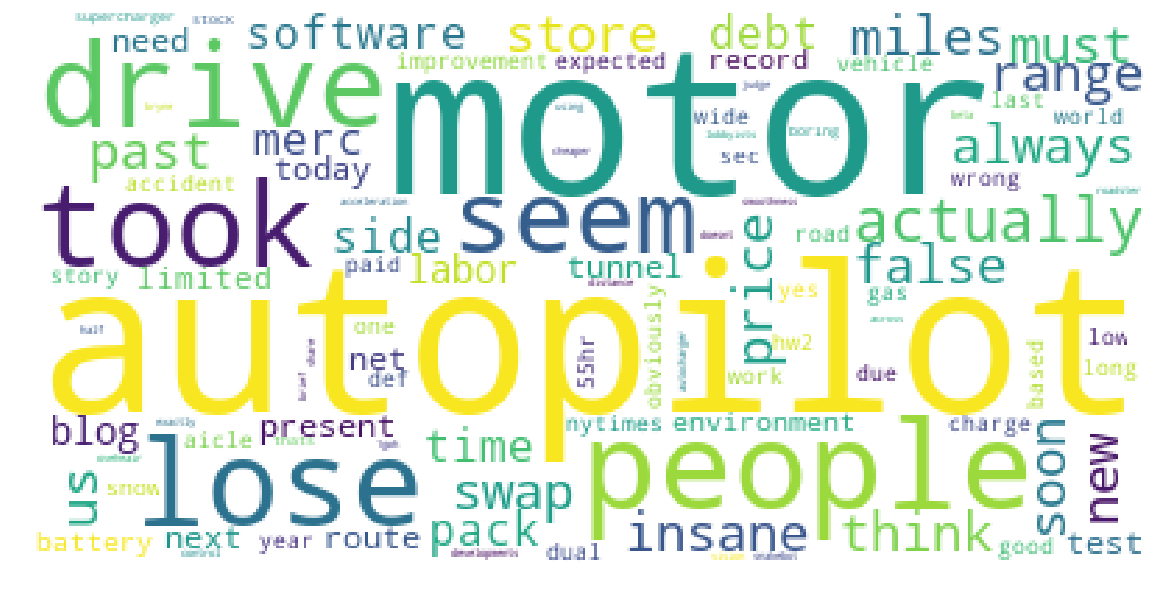

In [432]:
#patt = re.compile(r'rt|would|tesla|model|car|rocket|launch')
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(ng_twt.neg_tweet)))



ax.axis('off')
ax.imshow(wcp)

### Graphical representation of Elon's negative, neutral and positive tweets regarding Tesla:


In [410]:
def pos_or_neg(num):
    if num > 0:
        return 'pos'
    elif num == 0:
        return 'neutral'
    else:
        return 'neg'

In [411]:
elon_Tesla['pos_neg'] = elon_Tesla.tb_score.apply(pos_or_neg)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



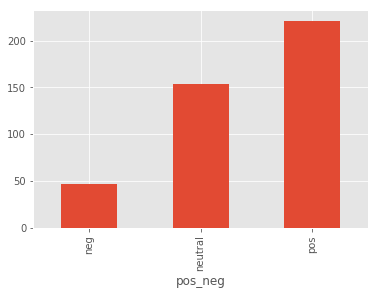

In [412]:
elon_Tesla.groupby('pos_neg').size().plot(kind='bar')

### Elon had 221 positive tweets and 47 negative tweet from a total of 422 tweets that he tweeted about Tesla. 
### This gives a ratio of  52.4%  for positive tweets and 11% for negative tweets, with the remaining 36.6% to be neutral. 

## Analyzing Spacex Tweets:

In [387]:
elon_spacex = elon[elon.cleaned_tweets.str.contains("spacex")]

In [388]:
elon_spacex.head(40)

row ID                                              Tweet  \
19      Row19  Simulation of how the SpaceX Interplanetary Sp...   
55      Row55  Putting together SpaceX rocket landing blooper...   
58      Row58  We took the SpaceX/Tesla Hyperloop pusher pod ...   
66      Row66  @bryanclark Hyperloop (near) vacuum tube runs ...   
70      Row70  Will run the SpaceX pusher sled later this wee...   
92      Row92  @SmileSimplify @beboutside @Hyperloop @SpaceX ...   
94      Row94  @beboutside @Hyperloop @SpaceX @paradigm_hype ...   
113    Row113  @DiscoverMag That's a SpaceX engineer in there...   
117    Row117  First picture of SpaceX spacesuit. More in day...   
125    Row125  SpaceX rocket factory as seen from space https...   
129    Row129  Pics of SpaceX spacesuit developed for NASA co...   
144    Row144  @neddesmond @SpaceX The danger is def high for...   
145    Row145  @neddesmond @SpaceX We certainly could, but, w...   
190    Row190  SpaceX student Hyperloop top speed competition...   
237    Row237  @RyanBiddle603 @SpaceX We can't have too many ...   
243    Row243  RT @Teslarati: SpaceX skipping Red Dragon for ...   
280    Row280  @Oskaiper @valleyhack Commercially procured la...   
314    Row314  @SpaceX @INTELSAT Thanks @INTELSAT! Really pro...   
315    Row315  SpaceX team reviewed all systems again late la...   
323    Row323  Another SpaceX launch today if weather is good...   
326    Row326  @JaneidyEve @arstechnica @TeslaMotors @SpaceX ...   
385    Row385                      @partialobs @SpaceX Radiation   
420    Row420  $300M cost diff between SpaceX and Boeing/Lock...   
494    Row494  @kimchee_chigae @SpaceX Thanks :) Such an outr...   
508    Row508  RT @newscientist: SpaceX is the first private ...   
526    Row526  @commoboy @SpaceX Most people don't realize yo...   
540    Row540  RT @TheMarsSociety: Tomorrow, SpaceX Will Fore...   
729    Row729                @BadAstronomer @SpaceX Thanks Phil!   
730    Row730  Incredibly proud of the SpaceX team for achiev...   
743    Row743  Here is the latest SpaceX travel ad for the fl...   
839    Row839  SpaceX could not do this without NASA. Can't e...   
842    Row842            SpaceX announcement tomorrow at 1pm PST   
866    Row866  Counting down to the first SpaceX launch from ...   
868    Row868             spacex's photo https://t.co/ImEDAut3nI   
869    Row869  Provided Dragon 2 demo missions go well, Space...   
874    Row874  Daylight rocket launch & landing at the Cape t...   
890    Row890  @RusulAlrubail @MarkRuffalo @guardian Please c...   
969    Row969  Video of MIT's entrant into the SpaceX Hyperlo...   
996    Row996  Hyperloop pod race happening this weekend at S...   
1001  Row1001  @_wsimson Starting across from my desk at Spac...   

                     Time    Retweet from  \
19    2017-09-26 03:11:58             NaN   
55    2017-08-31 22:05:46             NaN   
58    2017-08-31 08:35:51             NaN   
66    2017-08-28 21:48:24             NaN   
70    2017-08-28 11:35:56             NaN   
92    2017-08-27 22:22:30             NaN   
94    2017-08-27 21:17:29             NaN   
113   2017-08-23 21:48:16             NaN   
117   2017-08-23 17:26:31             NaN   
125   2017-08-21 07:36:19             NaN   
129   2017-08-20 04:08:59             NaN   
144   2017-08-15 01:26:47             NaN   
145   2017-08-15 01:19:16             NaN   
190   2017-08-02 21:17:40             NaN   
237   2017-07-25 09:39:52             NaN   
243   2017-07-22 02:03:51       Teslarati   
280   2017-07-14 08:51:37             NaN   
314   2017-07-06 03:40:29             NaN   
315   2017-07-06 01:25:06             NaN   
323   2017-07-02 21:02:10             NaN   
326   2017-07-02 20:51:55             NaN   
385   2017-06-22 19:36:41             NaN   
420   2017-06-16 03:23:22             NaN   
494   2017-06-07 22:27:42             NaN   
508   2017-06-06 13:00:58    newscientist   
526   2017-06-05 08:44:36             NaN   
540

In [417]:
elon_spacex.count()

row ID                       102
Tweet                        102
Time                         102
Retweet from                  19
Tweet_cleaned_with_at        102
Year                         102
Month                        102
Day                          102
Hour                         102
AM_PM                        102
DOW                          102
Date                         102
Tweet_without_http_and_at    102
cleaned_tweets               102
tb_score                     102
pos_neg                      102
dtype: int64

#### Positive Tweets about Spacex

In [389]:
pos_spacex_twt =pd.DataFrame()

In [390]:
for i, row in elon_spacex.iterrows():
    if row['tb_score'] > 0:
        pos_spacex_twt.loc[i, 'pos_tweet'] = row['cleaned_tweets']

In [391]:
pos_spacex_twt.head()

pos_tweet
55   putting together spacex rocket landing blooper...
66   hyperloop near vacuum tube runs parallel to sp...
92   beboutside spacex swissloop the latter there a...
117  first picture of spacex spacesuit more in days...
129  pics of spacex spacesuit developed for nasa co...

In [392]:
pos_spacex_twt = pos_spacex_twt.reset_index(drop=True)

In [393]:
pos_spacex_twt.head(10)

pos_tweet
0  putting together spacex rocket landing blooper...
1  hyperloop near vacuum tube runs parallel to sp...
2  beboutside spacex swissloop the latter there a...
3  first picture of spacex spacesuit more in days...
4  pics of spacex spacesuit developed for nasa co...
5  spacex we certainly could but while not sugges...
6  spacex student hyperloop top speed competition...
7  spacex we cant have too many direct shareholde...
8  intelsat thanks really proud of the rocket and...
9  spacex team reviewed all systems again late la...

In [394]:
pos_spacex_twt.count()

pos_tweet    55
dtype: int64

#### A Word Cloud representing the most words used in Elon's positive tweets about Spacex


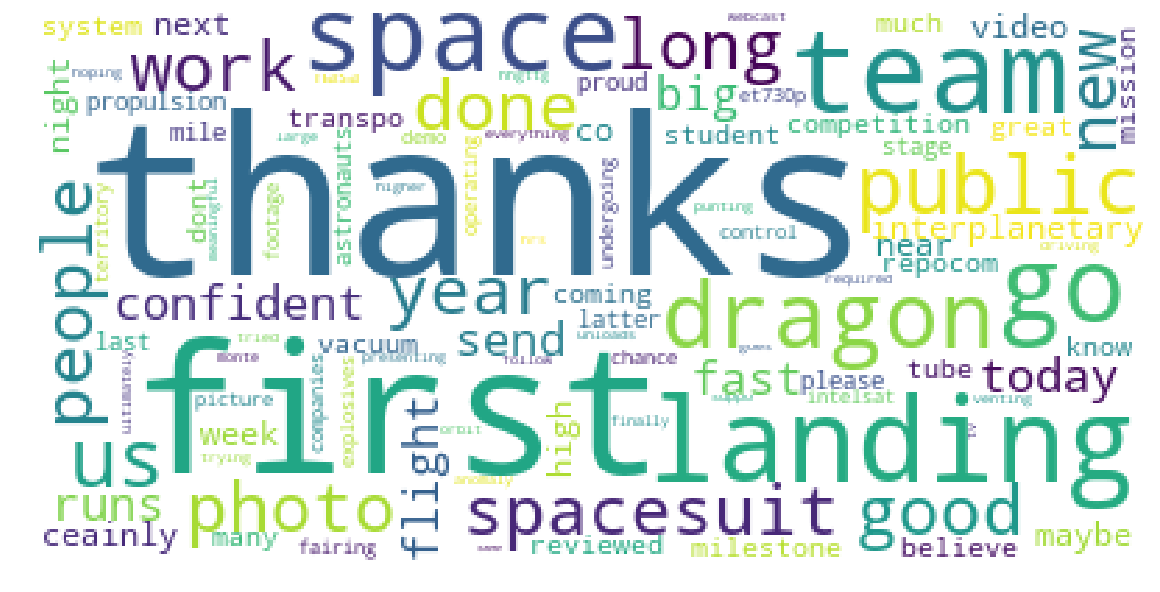

In [433]:
#patt = re.compile(r'rt|would|tesla|model|car|rocket|launch|spacex')

fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(pos_spacex_twt.pos_tweet)))



ax.axis('off')
ax.imshow(wcp)

#### Negative Tweets about Spacex

In [395]:
neg_spacex_twt =pd.DataFrame()

In [396]:
for i, row in elon_spacex.iterrows():
    if row['tb_score'] < 0:
        neg_spacex_twt.loc[i, 'neg_tweet'] = row['cleaned_tweets']

In [397]:
neg_spacex_twt = neg_spacex_twt.reset_index(drop=True)

In [398]:
neg_spacex_twt.head()

neg_tweet
0  we took the spacextesla hyperloop pusher pod f...
1  hyperloop paradigmhype spacex and the boring c...
2  spacex the danger is def high for south korea ...
3  spacex thanks  such an outrageous lawsuit peop...
4  rt watch spacexs 52m satellite fairing is test...

In [399]:
neg_spacex_twt.count()

neg_tweet    6
dtype: int64

#### A Word Cloud representing the most  words used in Elon's negative tweets about Spacex


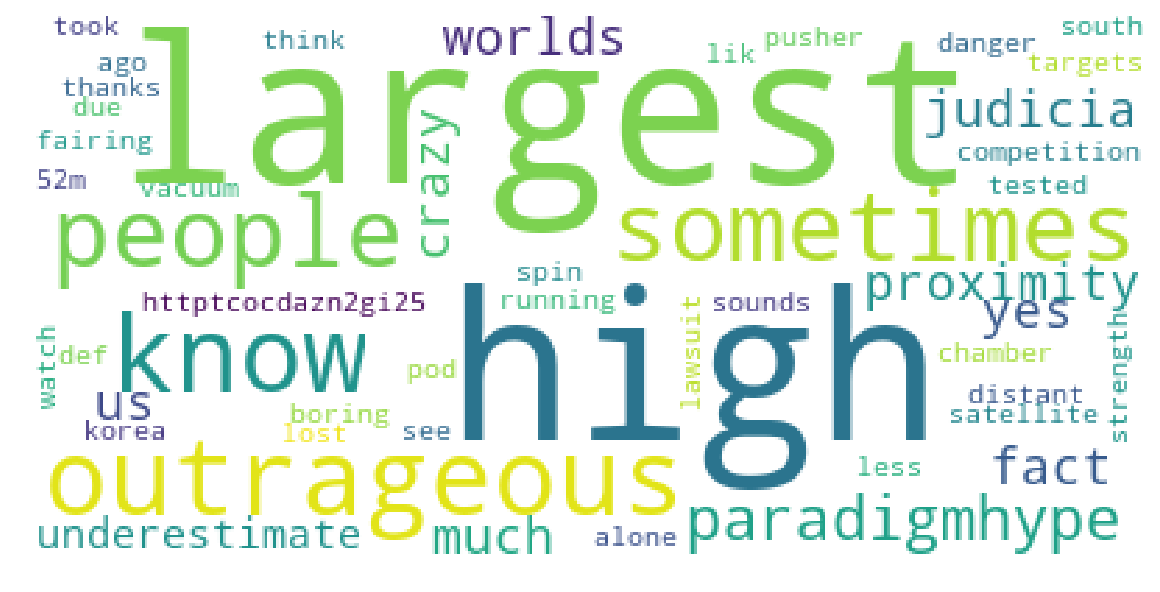

In [434]:
#patt = re.compile(r'rt|would|tesla|model|car|rocket|launch|spacex|hyperloop|company|highdays|days')

fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(neg_spacex_twt.neg_tweet)))



ax.axis('off')
ax.imshow(wcp)

### Graphical representation of Elon's negative, neutral and positive tweets regarding Spacex:

In [408]:
elon_spacex['pos_neg'] = elon_spacex.tb_score.apply(pos_or_neg)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



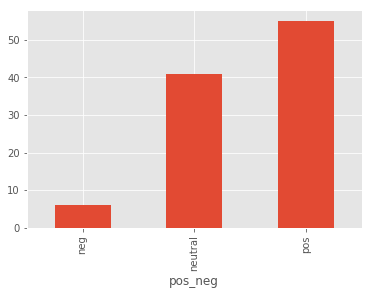

In [409]:
elon_spacex.groupby('pos_neg').size().plot(kind='bar')

### Elon had 55 positive tweets and 6 negative tweet from a total of 102 tweets that he tweeted about spacex. This gives a ratio of  53.92%  for positive tweets and 5.88% for negative tweets, with the remaining 40.26% to be neutral. 

### The low ratio of negative tweets can be explained as part of Elon's Twitter account purpose. He uses his account to market his companies and promote his ideas and brands. Thus a low ratio for negative tweets should not be surprising, since he is the CEO of his companies, and his goal is to promote it and market for it. 
### On the other hand, his positive tweets were not extremely high, which we would normaly expect from a CEO who is trying to promote his companies (as mentioned above) . This could be interpreted in a way that Elon is trying to be unbiase as much as possible and remain in the neutral zone, which explains the high percentage of his neutral tweets for both of his companies.

### Elon has more than 16.5 million followers and he uses his Twitter Platform for sharing his ideas, but most importantly to gather feedback and critics from his customers. He takes time to reply to his customers and tries to solve the issues raised. 

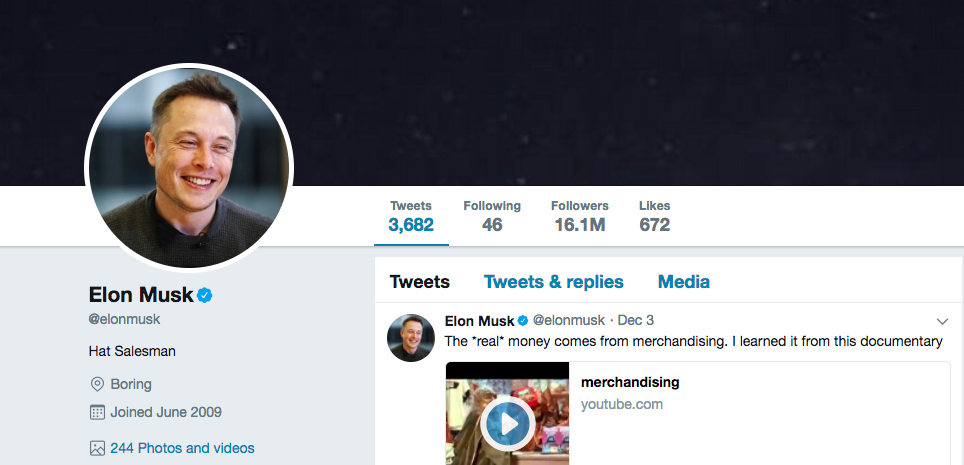

In [401]:
from IPython.core.display import Image, display
display(Image('ElonMusk.png', width = 700, unconfined=True))

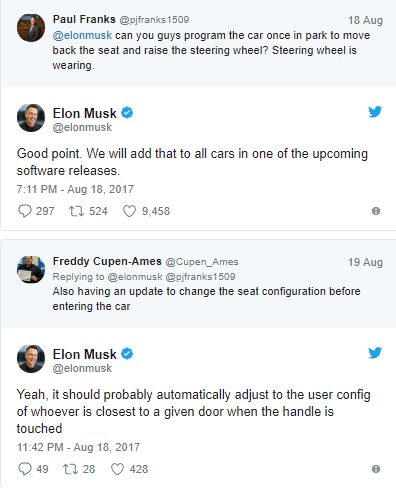

In [402]:
from IPython.core.display import Image, display
display(Image('replies.png', width = 700, unconfined=True))


## Elon Musk clearly uses Twitter and his customers' concerns seriously. His willingness to personally respond to customer feedback, and promoting his companies while keeping his tweets reasonably balanced, are all factors that increase credibility and contribute to his companies' success and growth. 